In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parâmetros do problema
a = 1.0 
L = 10.0 
T = 2.0  
nx = 200
nt = 200 
dx = L / nx 
dt = T / nt 
c = a * dt / dx 

# Malha espacial e temporal
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

In [4]:
# Condição inicial suave (Gaussiana)
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Condição inicial menos regular (função degrau)
def step_function(x):
    return np.where(x < L / 2, 1.0, 0.0)

In [5]:
# Função para aplicar os esquemas numéricos
def solve_transport(u0, scheme, c, nt):
    u = u0.copy()
    for n in range(nt - 1):
        if scheme == "lax_friedrichs":
            u[1:-1] = 0.5 * (u[2:] + u[:-2]) - 0.5 * c * (u[2:] - u[:-2])
        elif scheme == "upwind":
            u[1:-1] = u[1:-1] - c * (u[1:-1] - u[:-2])
        elif scheme == "lax_wendroff":
            u[1:-1] = u[1:-1] - 0.5 * c * (u[2:] - u[:-2]) + 0.5 * c**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
        u[0] = u[-2]
        u[-1] = u[1]
    return u

# Condições iniciais
u0_gaussian = gaussian(x, L / 2, 0.5)  # Gaussiana centrada em L/2
u0_step = step_function(x)

# Resolver para cada esquema e condição inicial
schemes = ["lax_friedrichs", "upwind", "lax_wendroff"]
results = {}

for scheme in schemes:
    results[f"{scheme}_gaussian"] = solve_transport(u0_gaussian, scheme, c, nt)
    results[f"{scheme}_step"] = solve_transport(u0_step, scheme, c, nt)

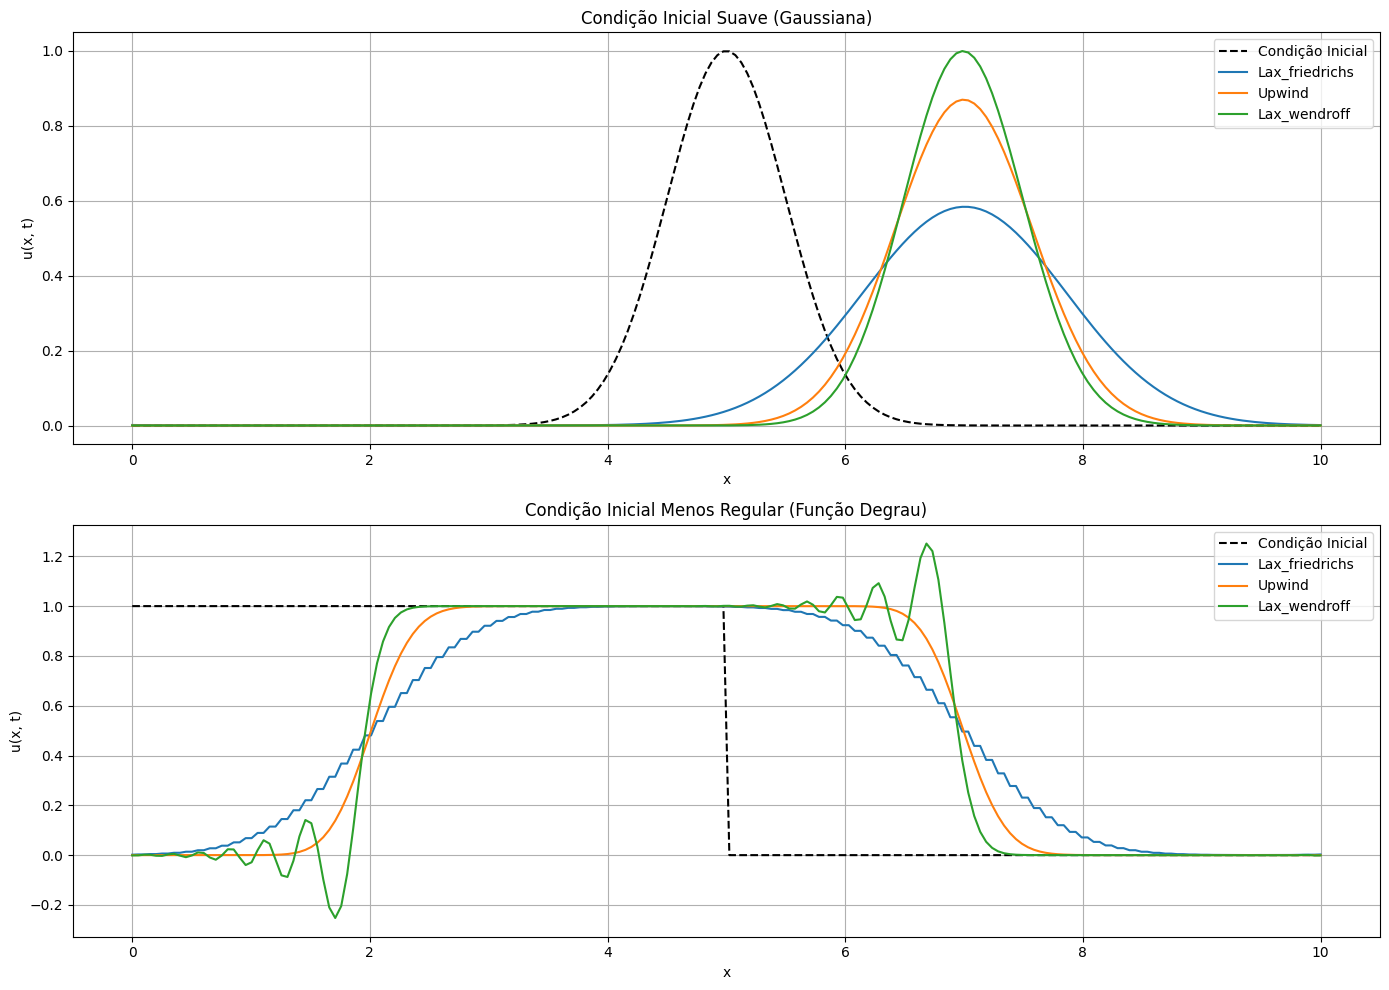

In [6]:
# Plotar os resultados
plt.figure(figsize=(14, 10))

# Condição inicial suave (Gaussiana)
plt.subplot(2, 1, 1)
plt.plot(x, u0_gaussian, label="Condição Inicial", linestyle="--", color="black")
for scheme in schemes:
    plt.plot(x, results[f"{scheme}_gaussian"], label=f"{scheme.capitalize()}")
plt.title("Condição Inicial Suave (Gaussiana)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()

# Condição inicial menos regular (função degrau)
plt.subplot(2, 1, 2)
plt.plot(x, u0_step, label="Condição Inicial", linestyle="--", color="black")
for scheme in schemes:
    plt.plot(x, results[f"{scheme}_step"], label=f"{scheme.capitalize()}")
plt.title("Condição Inicial Menos Regular (Função Degrau)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()